<a href="https://colab.research.google.com/github/SriSharanya-617/ensemblelearning/blob/main/ensemblelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/Social_Network_Ads.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Mounted at /content/drive
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[:,2:4].values #age,estimated salry
y=df.iloc[:,4].values #purchased

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#standardistion
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_model=DecisionTreeClassifier(max_depth=1)

#Adaboost
classifier=AdaBoostClassifier(estimator=base_model,n_estimators=50,learning_rate=1.0,random_state=42)

In [ ]:
classifier.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
y_pred=classifier.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.8875


[[48  4]
 [ 5 23]]


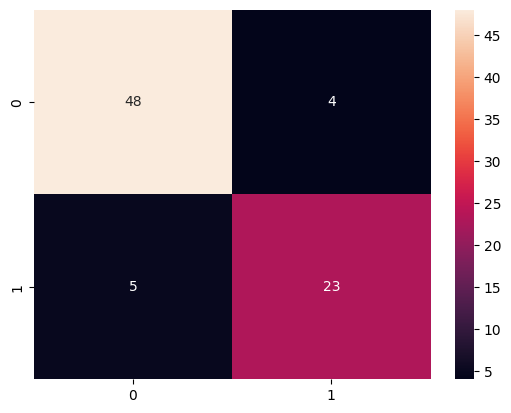

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
classifier.fit(x_train,y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred=classifier.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.8625


[[47  5]
 [ 6 22]]


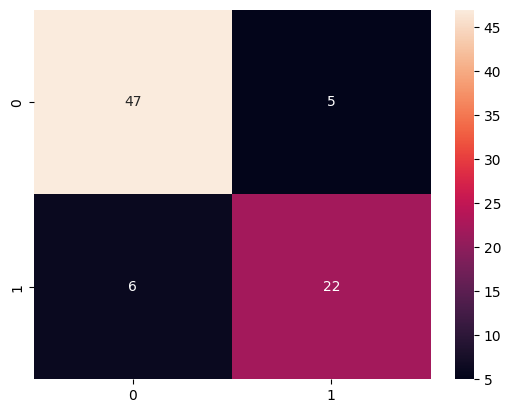

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:23:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


accuracy: 0.9375
[[49  3]
 [ 2 26]]


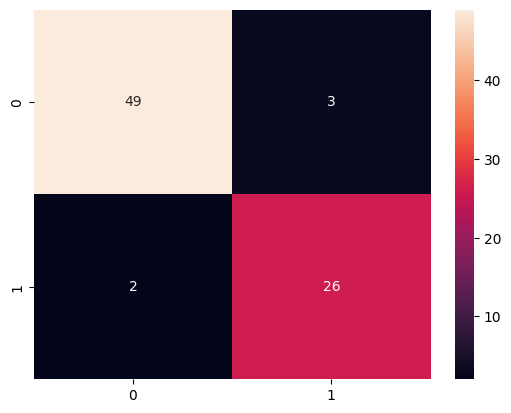

In [ ]:
#XG(extremne Gradient) Boost
from xgboost import XGBClassifier
classifier=XGBClassifier(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=3,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         random_state=42,
                         use_label_encoder=False,
                         eval_metric='logloss')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()